In [27]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Read and Visualize Data:

In [28]:
df = pd.read_csv('./data/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [29]:
# Print dataset info
def print_dataset_info(df):
    num_rows, num_columns = df.shape

    print("========== DATASET INFO ==========")
    print(f"Number of entries: {num_rows}")
    print(f"Number of columns: {num_columns}")
    print()
    print(df.info())
    print()
    print(df.isnull().sum())

In [30]:
print_dataset_info(df)

========== DATASET INFO ==========
Number of entries: 48895
Number of columns: 16

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_

Roughly 1/5 of the dataset has nulls, let's get rid of them

In [31]:
clean_df = df.dropna()
clean_df.head()
print_dataset_info(clean_df)

========== DATASET INFO ==========
Number of entries: 38821
Number of columns: 16

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_

In [162]:
#Set seaborn themes
#sns.set_theme(style="whitegrid")
sns.set_theme()
sns.set_color_codes("pastel")

In [150]:
def comparison_count(df1, df2, column, figsize=None, same_ordering=True):
    df1 = df1.groupby([column])[column].count().sort_values(ascending=False).head(50)
    df2 = df2.groupby([column])[column].count().sort_values(ascending=False).head(50)

    if figsize:
        f, ax = plt.subplots(1, 2, figsize=figsize)
    else:
        f, ax = plt.subplots(1, 2)
    
    order_plot_2 = df1.keys() if same_ordering else df2.keys()
    
    #Plot df1 dataset info
    ax[0].set_title("Raw dataset")
    ax[0].set_xlabel("Count")
    sns.barplot(x=df1.values, y=df1.keys(),
                label=column + " count", color="b", ax=ax[0], orient='h', order=df1.keys())
    ax[0].set_ylabel(column.capitalize())

    #Plot df2 dataset info
    ax[1].set_title("Clean dataset")
    ax[1].set_xlabel("Count")
    sns.barplot(x=df2.values, y=df2.keys(),
                label=column + "count", color="b", ax=ax[1], orient='h', order=order_plot_2)
    ax[1].set_ylabel(column.capitalize())

    plt.show()

### `Neighbourhood` column exploration

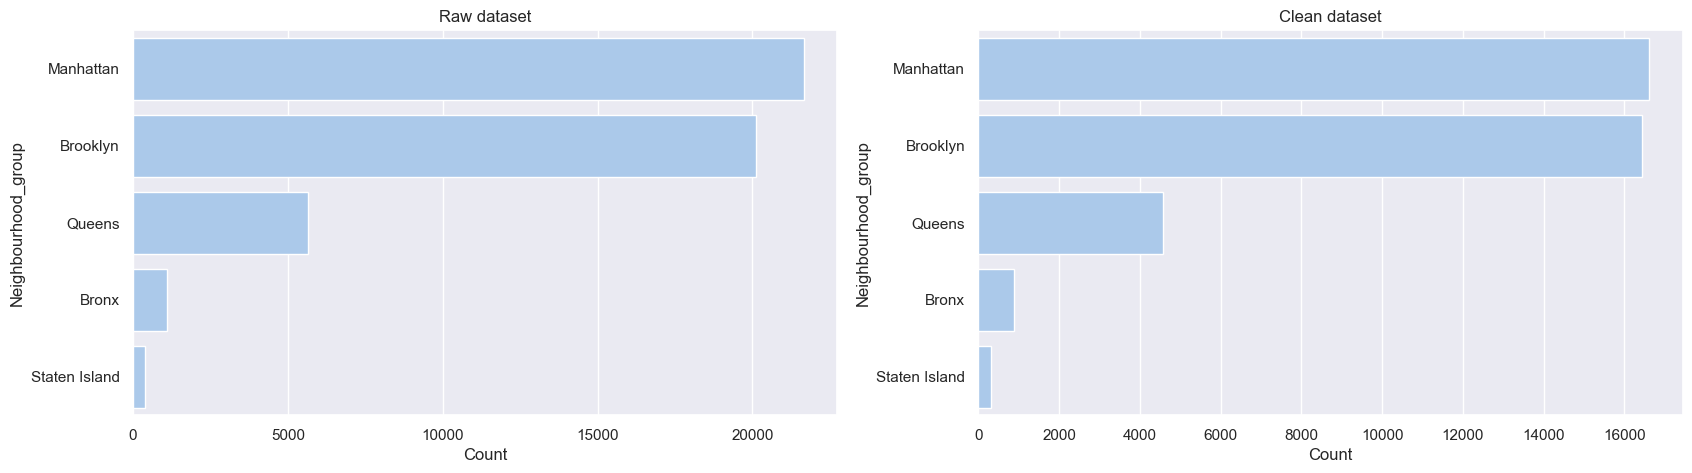

In [163]:
#Neighbourhood column exploration
comparison_count(df, clean_df, "neighbourhood_group", figsize=(20,5))

### `Host` column exploration

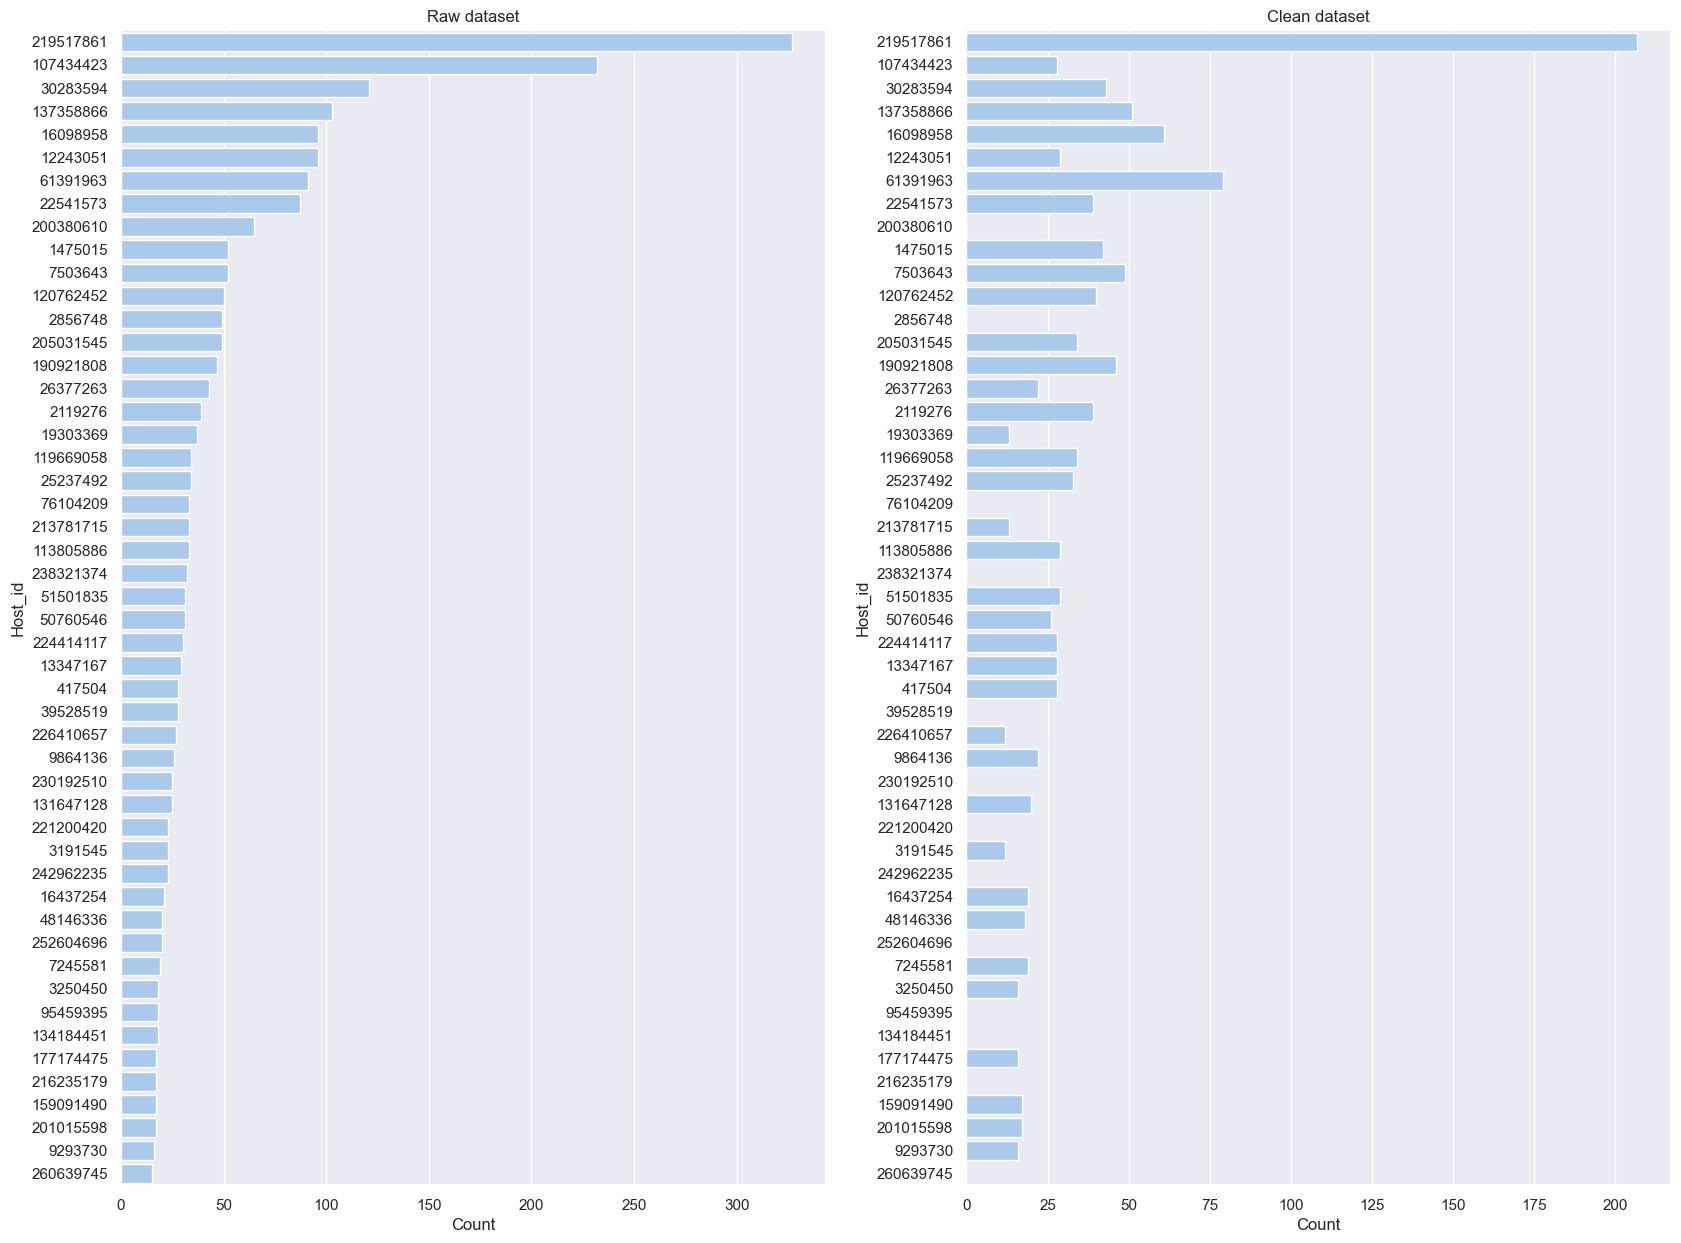

In [164]:
#Host column exploration
comparison_count(df, clean_df, "host_id", figsize=(20,15))

### `Room Type` column exploration

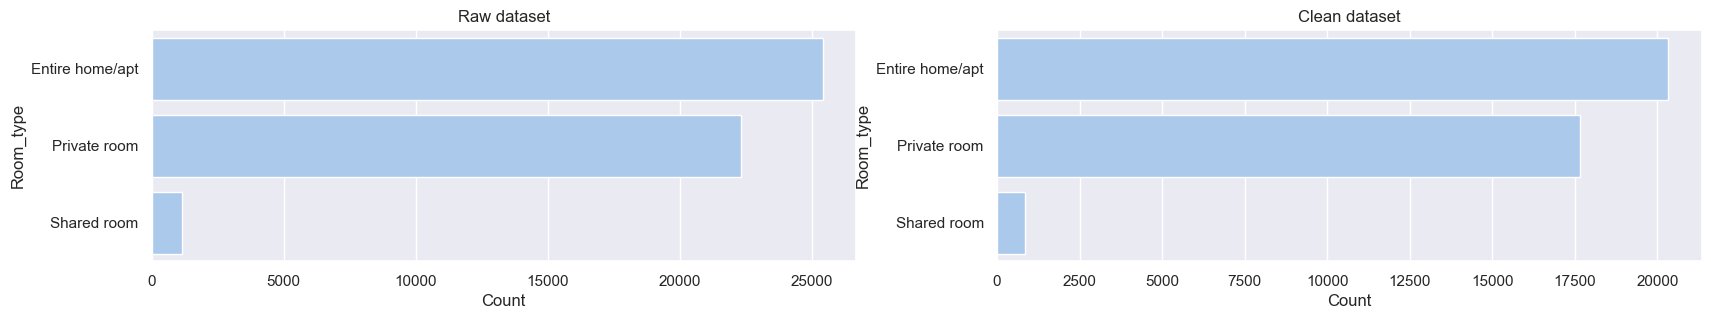

In [165]:
#Room Type column exploration
comparison_count(df, clean_df, "room_type", figsize=(20,3))

### `Price`, `Number of reviews`, `Reviews per month`, `Calculated host listings count` and `Availability` column exploration

In [197]:
def plot_hist_box(df, column ,ax_line, top_q=None, bot_q=None):

    if top_q:
        df = df[df[column] < df[column].quantile(top_q)]
    if bot_q:
        df = df[df[column] > df[column].quantile(bot_q)]

    sns.histplot(df[column], bins=45, kde=True, ax=ax_line[0])
    ax_line[0].set_title("Histogram")
    sns.boxplot(x=df[column], ax=ax_line[1], orient='h')
    ax_line[1].set_title("Boxplot")

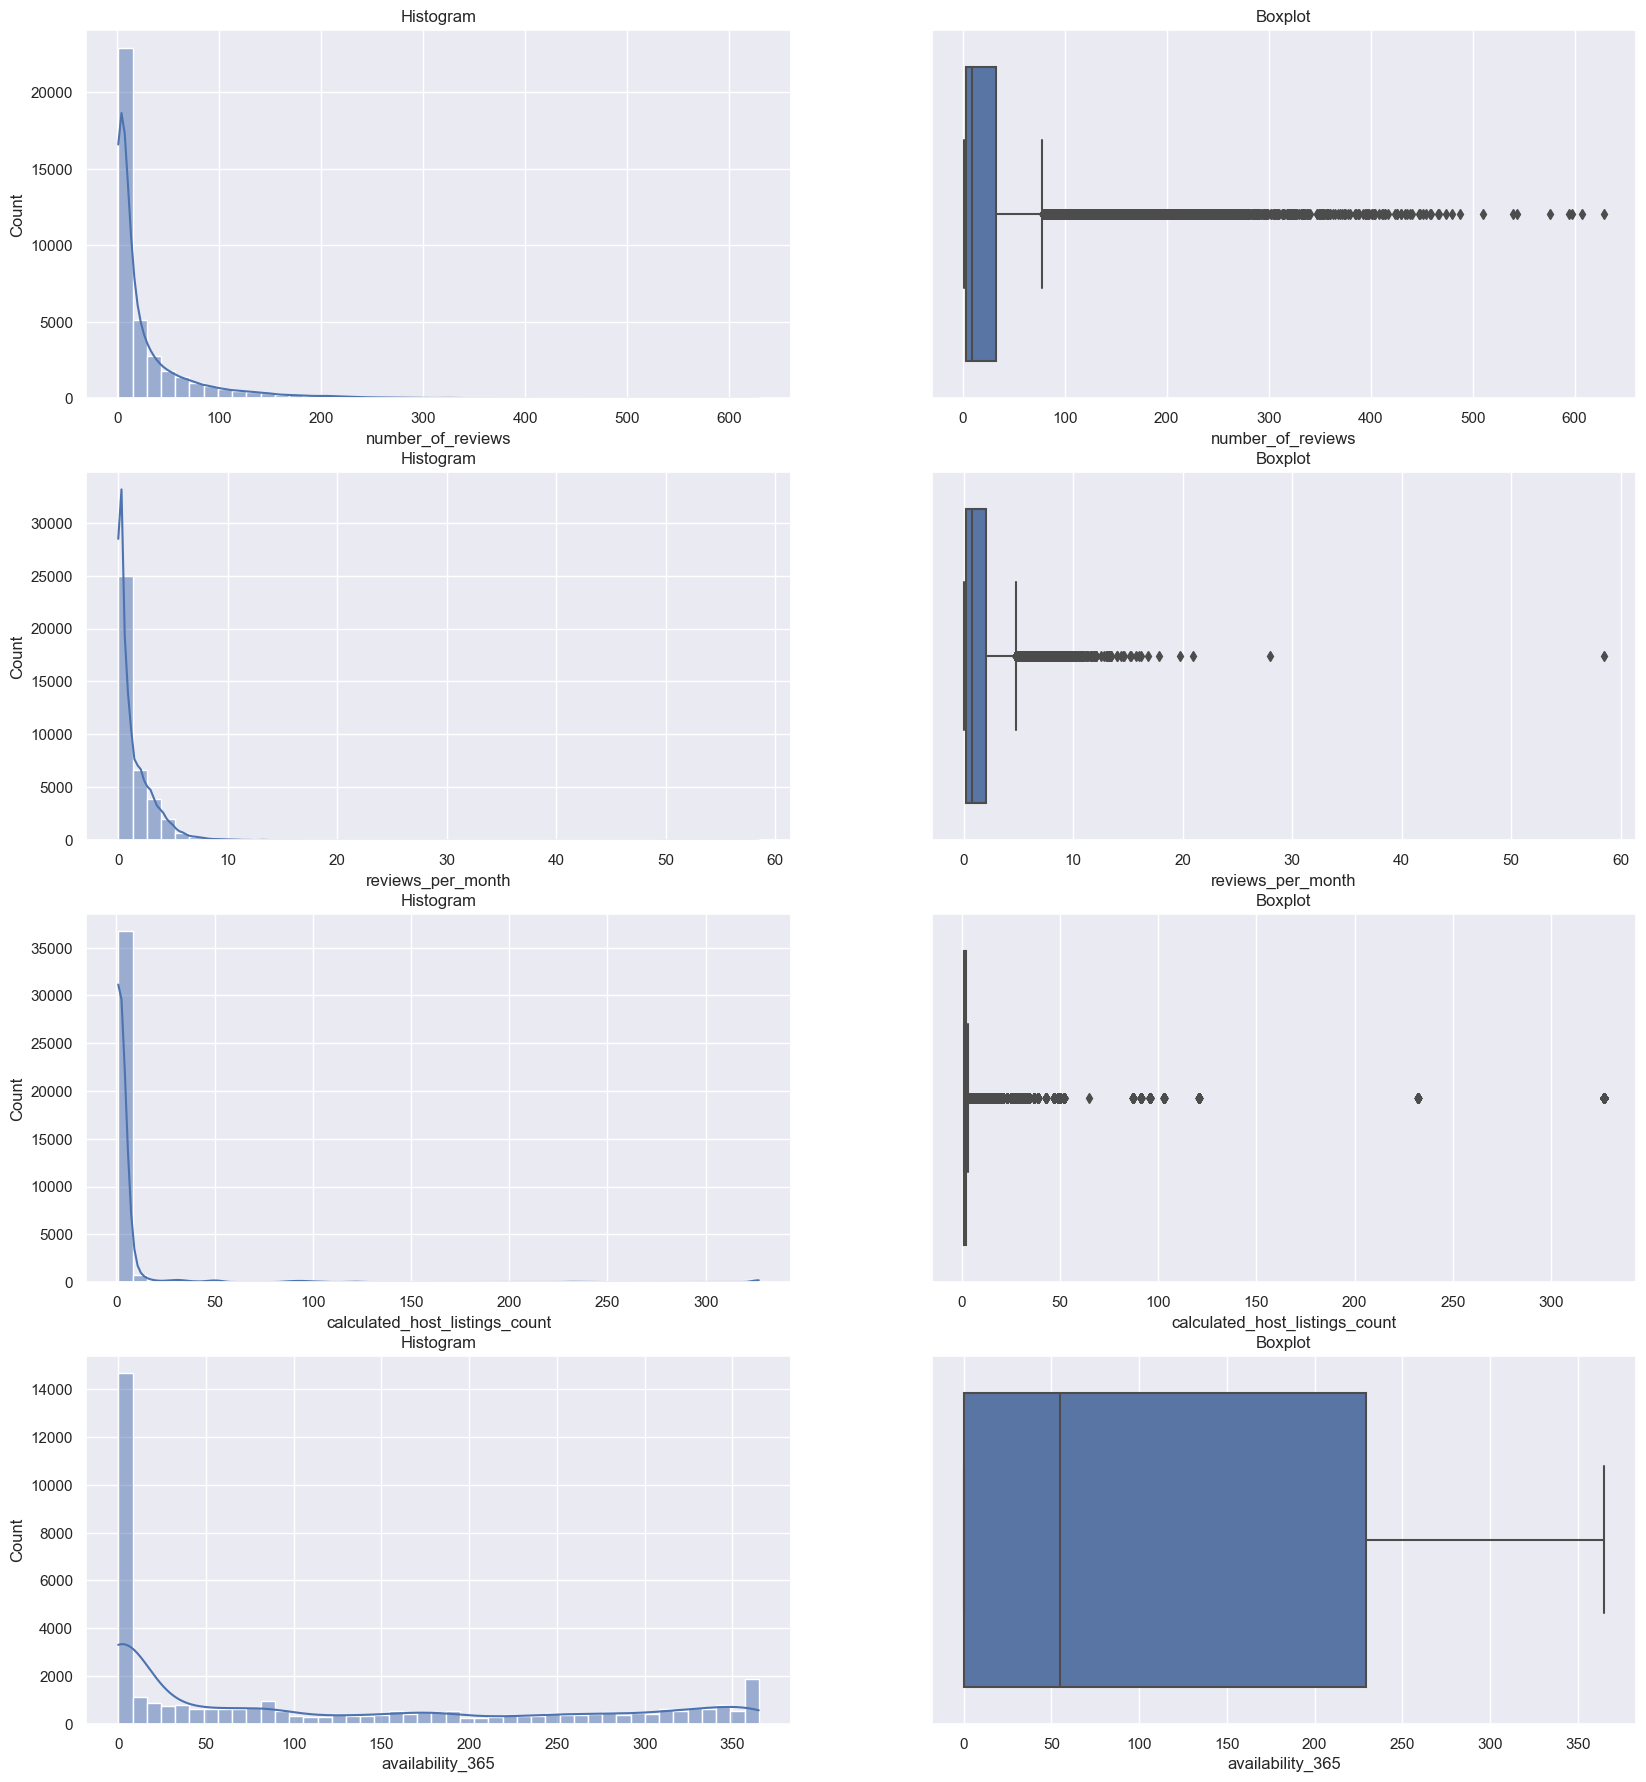

In [199]:
fig, ax = plt.subplots(4, 2, figsize=(20,22))
plot_hist_box(clean_df, 'number_of_reviews', ax_line=ax[0])
plot_hist_box(clean_df, 'reviews_per_month', ax_line=ax[1])
plot_hist_box(clean_df, 'calculated_host_listings_count', ax_line=ax[2])
plot_hist_box(clean_df, 'availability_365', ax_line=ax[3])
plt.show()

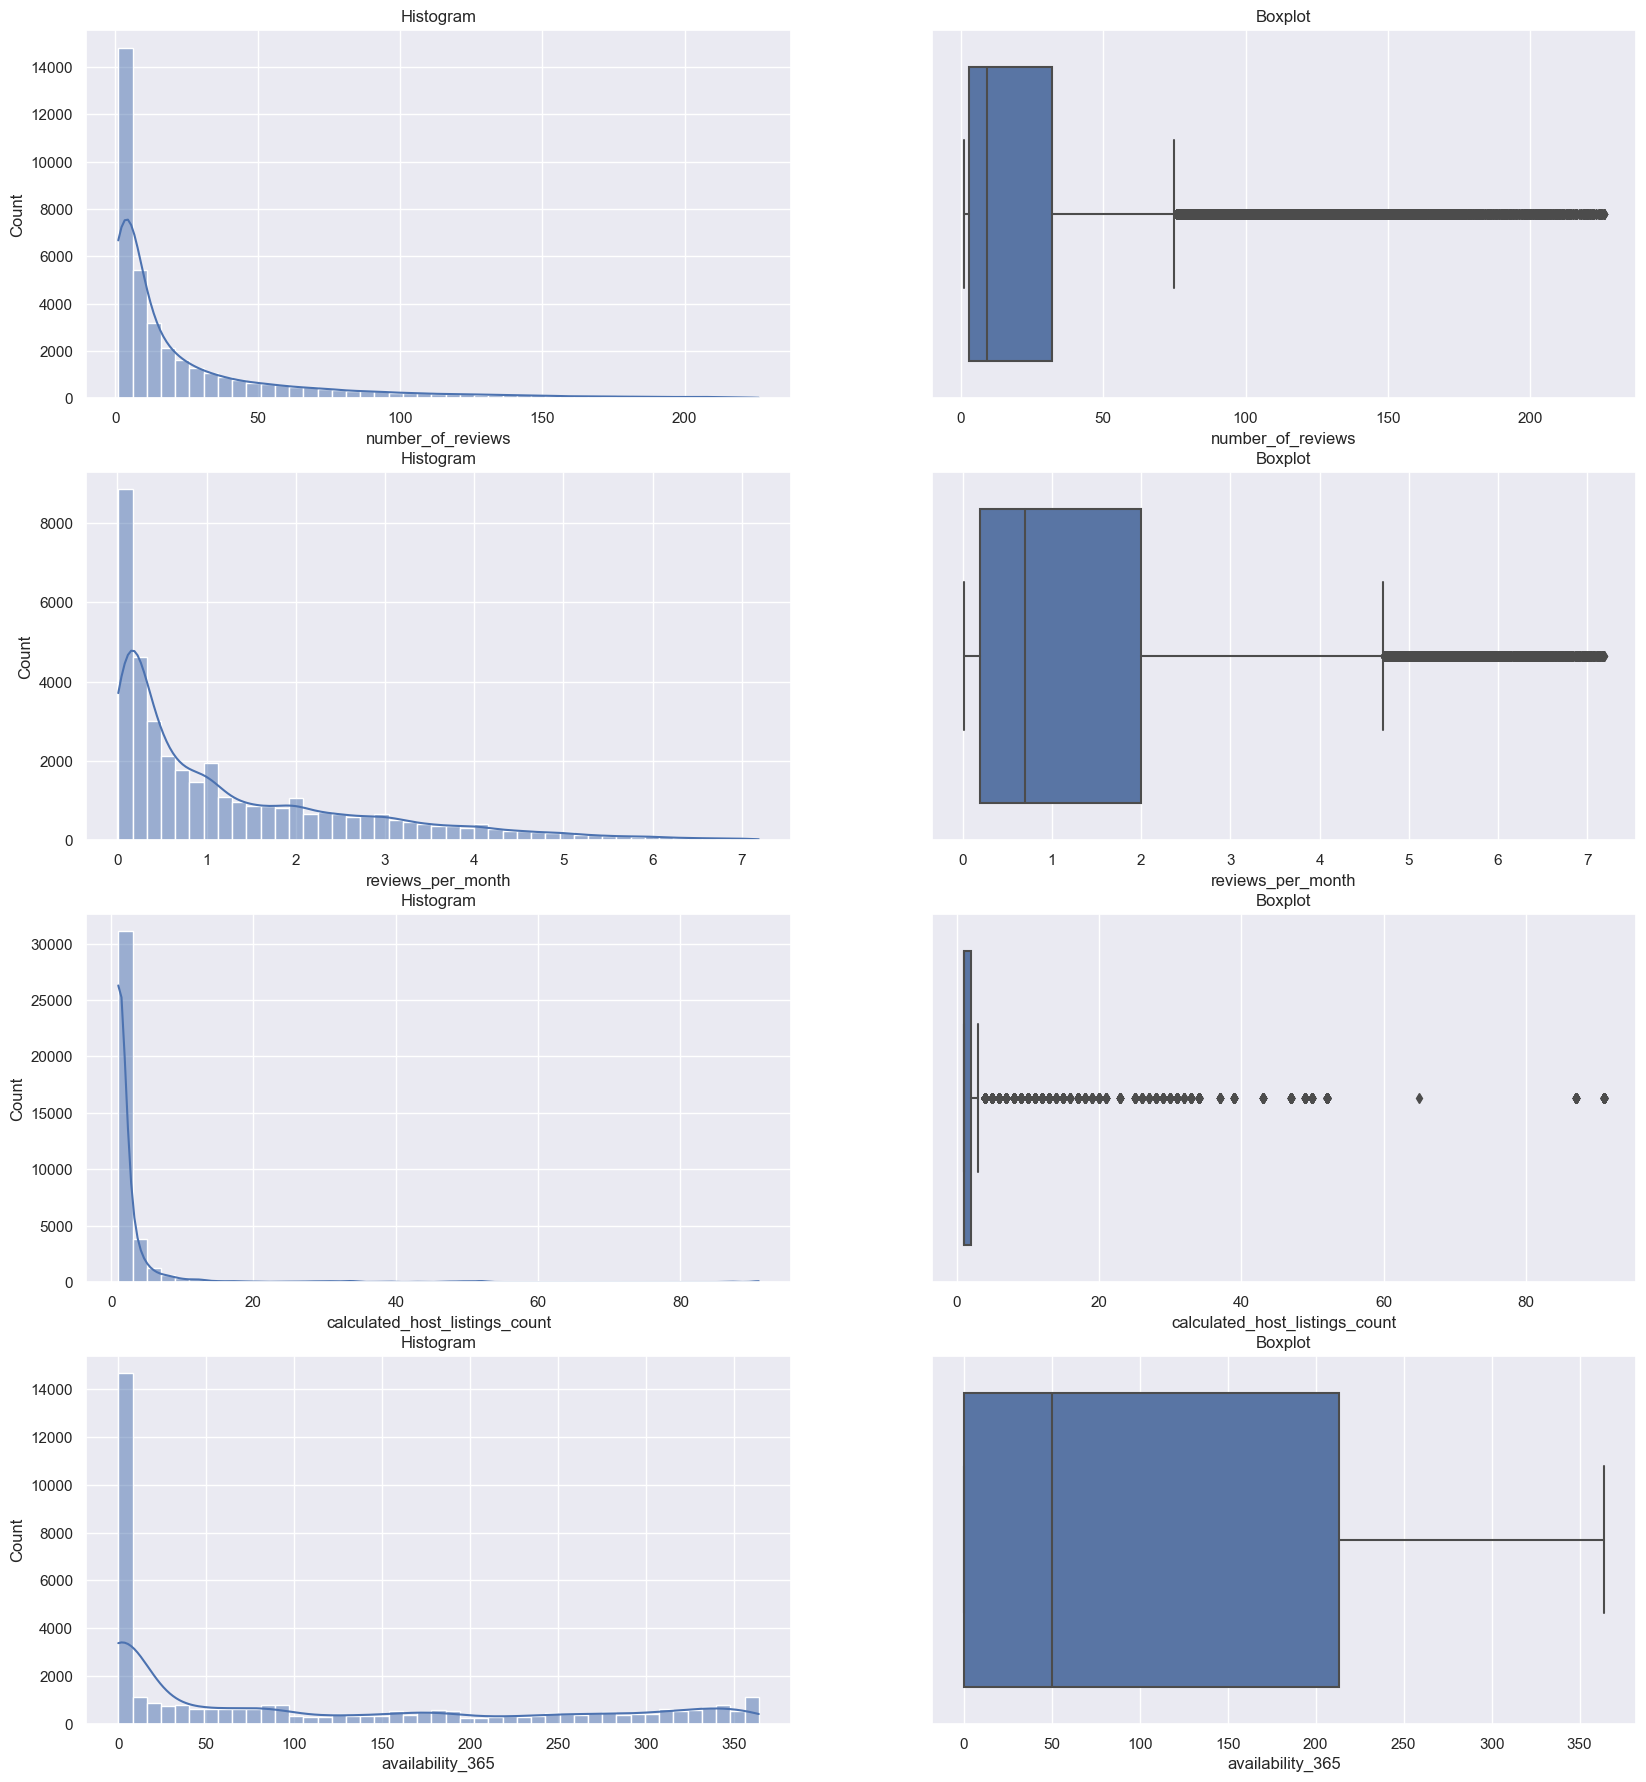

In [201]:
# Removing some outliers
fig, ax = plt.subplots(4, 2, figsize=(20,22))
plot_hist_box(clean_df, 'number_of_reviews', ax_line=ax[0], top_q=0.99)
plot_hist_box(clean_df, 'reviews_per_month', ax_line=ax[1], top_q=0.99)
plot_hist_box(clean_df, 'calculated_host_listings_count', ax_line=ax[2], top_q=0.99)
plot_hist_box(clean_df, 'availability_365', ax_line=ax[3], top_q=0.99)
plt.show()

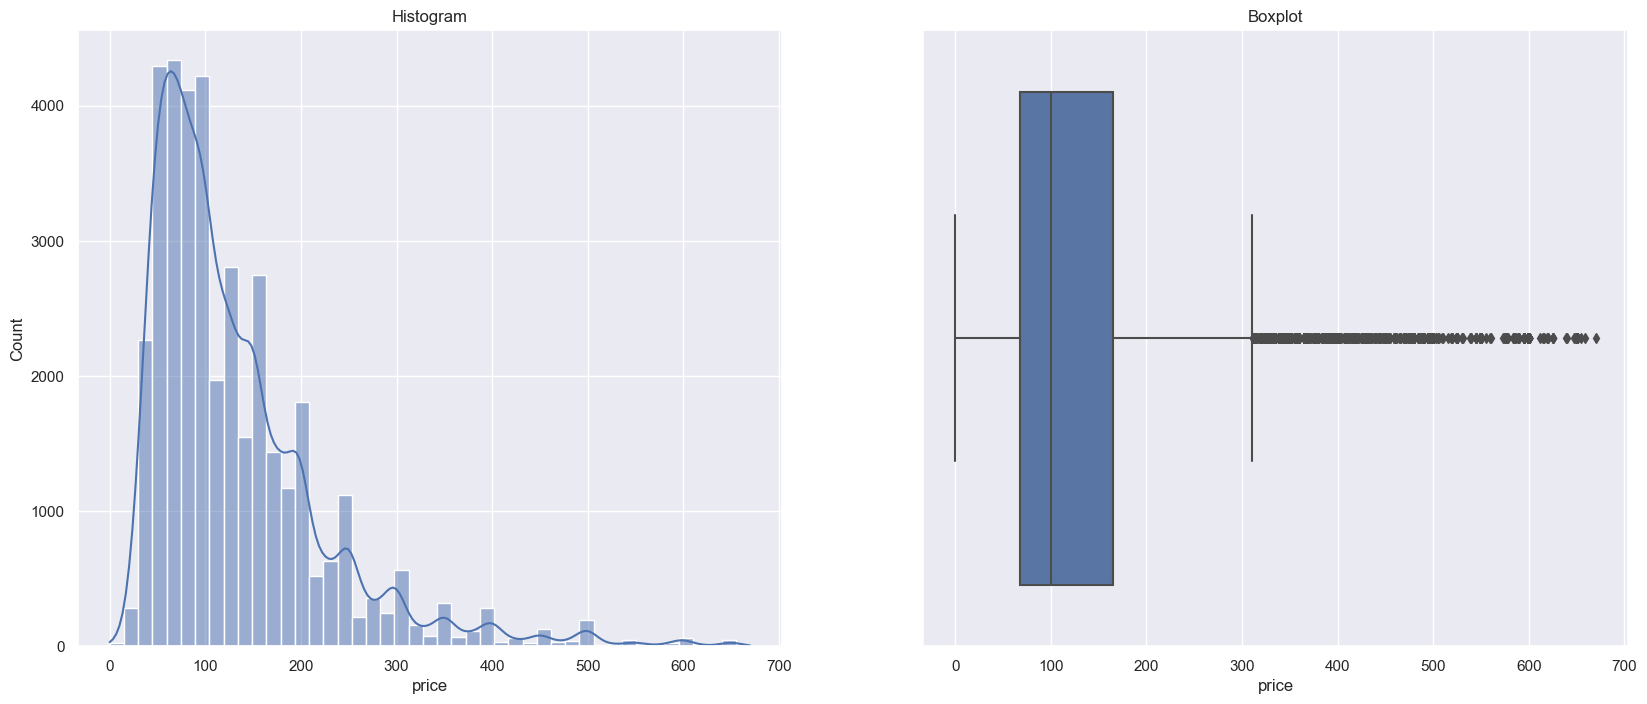

In [202]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
plot_hist_box(clean_df, 'price', ax_line=ax, top_q=0.99)
plt.show()